In [1]:
#Імпорт бібліотек 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Функція для нормалізації (min-max scaling)
def normalize(column):
    min_val = column.min()
    max_val = column.max()
    if max_val == min_val:
        return np.zeros_like(column) 
    return (column - min_val) / (max_val - min_val)

# Функція для розрахунку коефіцієнта Спірмена (NumPy)
def spearman_coef_np(array1, array2):
    data1_rank = np.argsort(np.argsort(array1))
    data2_rank = np.argsort(np.argsort(array2))
    d = data1_rank - data2_rank
    d_squared = d**2
    n = len(array1)
    if n * (n**2 - 1) == 0:
        return np.nan 
    coef = 1 - (6 * np.sum(d_squared)) / (n * (n**2 - 1))
    return round(coef, 3)

In [2]:
# 1 - Зчитування та очищення даних

file_name = "DATA/adult.data"
headers = [
    'Age', 'Work_class', 'Final_weight', 'Education', 'Education_num',
    'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
    'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'
]

# Зчитування за допомогою Pandas 
print("Зчитування даних за допомогою Pandas...")
df = pd.read_csv(file_name, sep=",", header=None, names=headers, na_values='?')
print("Перші 5 рядків DataFrame (до очищення):\n", df.head())

# Очищення DataFrame
initial_rows_pd = len(df)
df = df.dropna() 
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 
df = df[~df.isin(['?']).any(axis=1)] 
final_rows_pd = len(df)

print(f"\nКількість рядків у DataFrame до очищення: {initial_rows_pd}")
print(f"Кількість рядків у DataFrame після очищення: {final_rows_pd}")
if df.isna().any().any() or (df == '?').any().any():
    print("\nЄ пусті значення або символи '?' у DataFrame після очищення: Так")
else:
    print("\nЄ пусті значення або символи '?' у DataFrame після очищення: Ні")
print("Перші 5 рядків DataFrame (після очищення):\n", df.head())

# Зчитування за допомогою NumPy
print("\nЗчитування даних за допомогою NumPy...")
data_array = np.genfromtxt(file_name, delimiter=', ', dtype=None, names=headers,
                           encoding=None, skip_header=1)
print("Перші 5 рядків NumPy масиву (до очищення):\n", data_array[:5])

# Очищення NumPy масиву
initial_rows_np = len(data_array)
string_data_array = np.array([tuple(str(item).strip() for item in row) for row in data_array])
mask = np.all((string_data_array != '?') & (string_data_array != 'nan'), axis=1)
cleaned_data_array = string_data_array[mask]
final_rows_np = len(cleaned_data_array)

print(f"\nКількість рядків у NumPy масиві до очищення: {initial_rows_np}")
print(f"Кількість рядків у NumPy масиві після очищення: {final_rows_np}")

has_question_mark_np = np.any(cleaned_data_array == '?')
has_nan_np = np.any(cleaned_data_array == 'nan')
if has_question_mark_np or has_nan_np:
    print("Є пусті значення або символи '?' у NumPy масиві після очищення: Так")
else:
    print("Є пусті значення або символи '?' у NumPy масиві після очищення: Ні")
print("Перші 5 рядків NumPy масиву (після очищення):\n", cleaned_data_array[:5])

# Оновлення dtype для NumPy після очищення для подальших операцій
dtype = [
    ('Age', '<f8'), ('Work_class', '<U16'), ('Final_weight', '<f8'),
    ('Education', '<U12'), ('Education_num', '<f8'), ('Marital_status', '<U21'),
    ('Occupation', '<U17'), ('Relationship', '<U14'), ('Race', '<U18'),
    ('Sex', '<U6'), ('Capital_gain', '<f8'), ('Capital_loss', '<f8'),
    ('Hours_per_week', '<f8'), ('Native_country', '<U26'), ('Income', '<U5')
]
structured_array = np.array([tuple(row) for row in cleaned_data_array], dtype=dtype)


Зчитування даних за допомогою Pandas...
Перші 5 рядків DataFrame (до очищення):
    Age         Work_class  Final_weight   Education  Education_num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        Marital_status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_gain  Capita

In [3]:
# 2 - Нормалізація даних

columns_to_normalize = ['Hours_per_week', 'Age', 'Final_weight', 'Capital_gain', 'Capital_loss']

# Нормалізація для DataFrame (Pandas) 
print("Нормалізація даних у DataFrame...")
df_normalize = df.copy()
for col in columns_to_normalize:
    df_normalize[col] = normalize(df_normalize[col])

print("Перші 5 рядків DataFrame після нормалізації (частина):\n")
print(df_normalize[columns_to_normalize].head())

# Нормалізація для NumPy масиву 
print("\nНормалізація даних у NumPy масиві...")
data_array_normalize = structured_array.copy()
for col in columns_to_normalize:
    temp_col = data_array_normalize[col].astype(float)
    normalized_temp_col = normalize(temp_col)
    data_array_normalize[col] = normalized_temp_col.astype(structured_array.dtype[col].str)

print("Перші 5 рядків NumPy масиву після нормалізації (частина):\n")
for col in columns_to_normalize:
    print(f"{col}: {data_array_normalize[col][:5]}")



Нормалізація даних у DataFrame...
Перші 5 рядків DataFrame після нормалізації (частина):

   Hours_per_week       Age  Final_weight  Capital_gain  Capital_loss
0        0.397959  0.301370      0.043338       0.02174           0.0
1        0.122449  0.452055      0.047277       0.00000           0.0
2        0.397959  0.287671      0.137244       0.00000           0.0
3        0.397959  0.493151      0.150212       0.00000           0.0
4        0.397959  0.150685      0.220703       0.00000           0.0

Нормалізація даних у NumPy масиві...
Перші 5 рядків NumPy масиву після нормалізації (частина):

Hours_per_week: [0.12244898 0.39795918 0.39795918 0.39795918 0.39795918]
Age: [0.45205479 0.28767123 0.49315068 0.15068493 0.2739726 ]
Final_weight: [0.04727738 0.1372439  0.15021184 0.22070301 0.1841093 ]
Capital_gain: [0. 0. 0. 0. 0.]
Capital_loss: [0. 0. 0. 0. 0.]


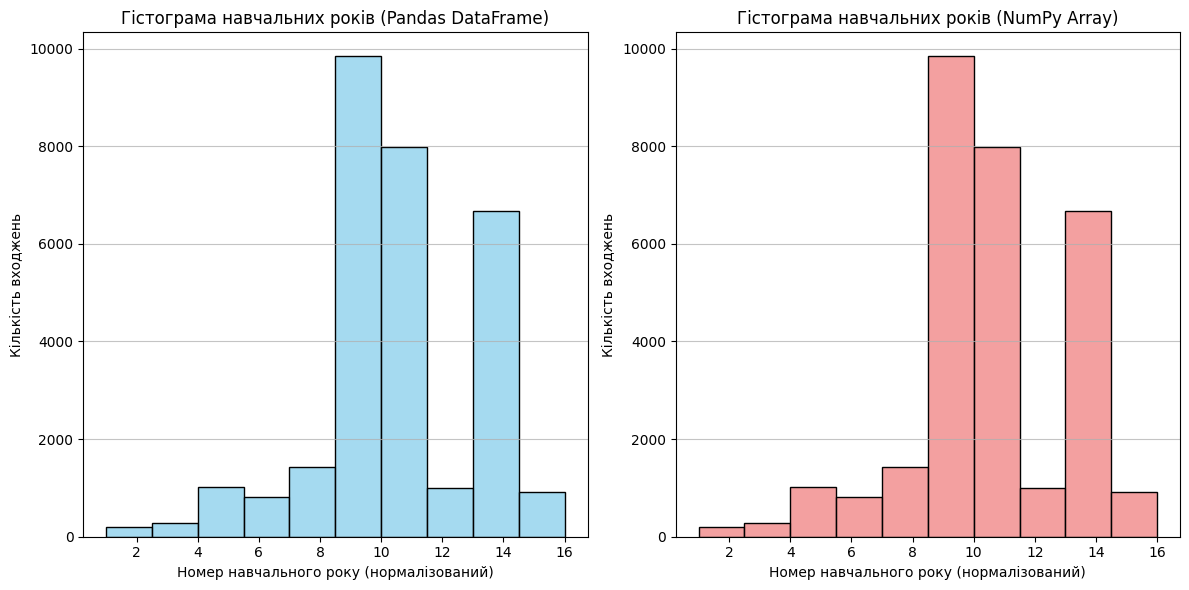

In [4]:
#3 - Візуалізація: Гістограми

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_normalize['Education_num'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Номер навчального року (нормалізований)')
plt.ylabel('Кількість входжень')
plt.title('Гістограма навчальних років (Pandas DataFrame)')
plt.grid(axis='y', alpha=0.75)

plt.subplot(1, 2, 2)
sns.histplot(data_array_normalize['Education_num'].astype(float), bins=10, color='lightcoral', edgecolor='black')
plt.xlabel('Номер навчального року (нормалізований)')
plt.ylabel('Кількість входжень')
plt.title('Гістограма навчальних років (NumPy Array)')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()



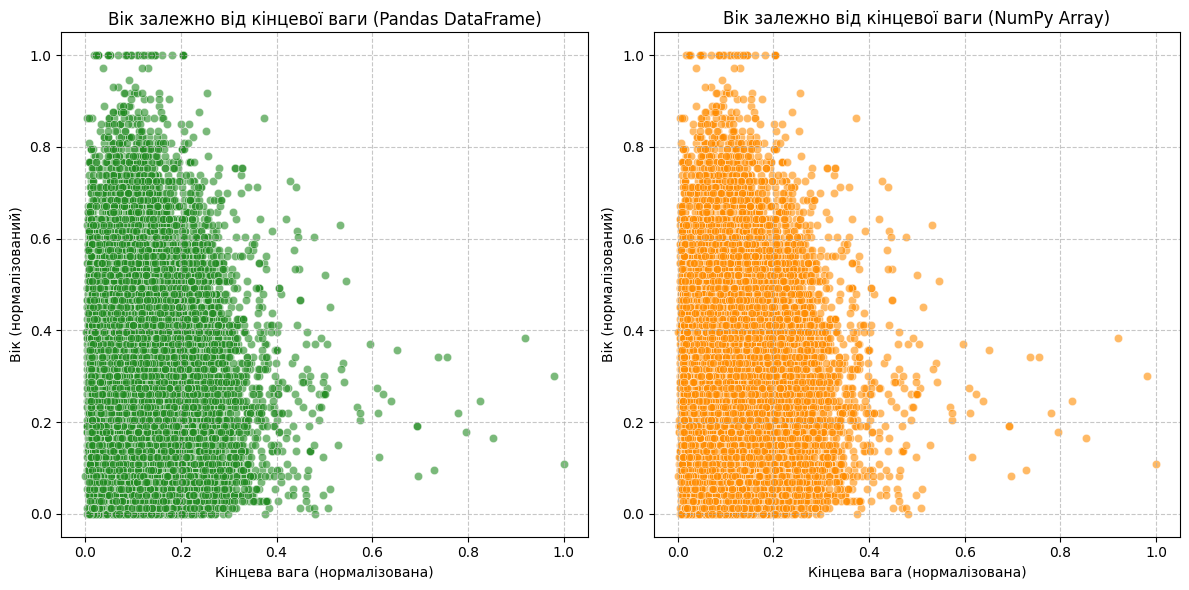

In [5]:
#4 - Візуалізація: Scatterplot


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_normalize, x='Final_weight', y='Age', color='forestgreen', alpha=0.6)
plt.xlabel('Кінцева вага (нормалізована)')
plt.ylabel('Вік (нормалізований)')
plt.title('Вік залежно від кінцевої ваги (Pandas DataFrame)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.scatterplot(x=data_array_normalize['Final_weight'].astype(float),
                y=data_array_normalize['Age'].astype(float), color='darkorange', alpha=0.6)
plt.xlabel('Кінцева вага (нормалізована)')
plt.ylabel('Вік (нормалізований)')
plt.title('Вік залежно від кінцевої ваги (NumPy Array)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [6]:
#5 - Коефіцієнти кореляції


# Коефіцієнти кореляції для DataFrame (Pandas)
pearson_pd = round(df_normalize['Age'].corr(df_normalize['Final_weight'], method='pearson'), 3)
spearman_pd = round(df_normalize['Final_weight'].corr(df_normalize['Age'], method='spearman'), 3)

print(f'Коефіцієнт Пірсона (Pandas DataFrame): {pearson_pd}')
print(f'Коефіцієнт Спірмена (Pandas DataFrame): {spearman_pd}')

#Коефіцієнти кореляції для NumPy масиву 
age_np = data_array_normalize['Age'].astype(float)
final_weight_np = data_array_normalize['Final_weight'].astype(float)

pearson_np = round(np.corrcoef(age_np, final_weight_np)[0, 1], 3)
spearman_np = spearman_coef_np(age_np, final_weight_np) 

print(f'Коефіцієнт Пірсона (NumPy Array): {pearson_np}')
print(f'Коефіцієнт Спірмена (NumPy Array): {spearman_np}')



Коефіцієнт Пірсона (Pandas DataFrame): -0.077
Коефіцієнт Спірмена (Pandas DataFrame): -0.078
Коефіцієнт Пірсона (NumPy Array): -0.077
Коефіцієнт Спірмена (NumPy Array): -0.078


In [10]:
#6 - One-hot encoding

# One-Hot Encoding для DataFrame (Pandas) 
print("Виконання One-Hot Encoding для 'Race' у DataFrame...")
one_hot_pd = pd.get_dummies(df_normalize['Race'], prefix='Race')
df_encoded_pd = df_normalize.join(one_hot_pd)
df_encoded_pd[one_hot_pd.columns] = df_encoded_pd[one_hot_pd.columns].astype(int)

print("Перші 5 рядків DataFrame після One-Hot Encoding (стовпці 'Race' та нові):\n")
print(df_encoded_pd[['Race'] + list(one_hot_pd.columns)].head())

# One-Hot Encoding для NumPy масиву 
column_np = data_array_normalize['Race']
unique_values_np = np.unique(column_np)
value_to_index_np = {value: index for index, value in enumerate(unique_values_np)}
indexed_column_np = np.vectorize(value_to_index_np.get)(column_np)
one_hot_encoded_column_np = np.eye(len(unique_values_np))[indexed_column_np]

new_headers_np = list(headers) + [f'Race_{val}' for val in unique_values_np]

combined_array_parts = [structured_array[name] for name in structured_array.dtype.names]
combined_array_parts.extend([one_hot_encoded_column_np[:, i] for i in range(one_hot_encoded_column_np.shape[1])])

extended_dtype = structured_array.dtype.descr + [(f'Race_{val}', '<i4') for val in unique_values_np]

one_hot_encoded_data_np = np.empty(structured_array.shape[0], dtype=extended_dtype)
for name in structured_array.dtype.names:
    one_hot_encoded_data_np[name] = structured_array[name]
for i, val in enumerate(unique_values_np):
    one_hot_encoded_data_np[f'Race_{val}'] = one_hot_encoded_column_np[:, i].astype(int)


print("\nПерші 5 рядків NumPy масиву після One-Hot Encoding (стовпці 'Race' та нові):\n")
for i in range(5):
    row_str = f"Race: {one_hot_encoded_data_np['Race'][i]}, "
    for val in unique_values_np:
        row_str += f"Race_{val}: {one_hot_encoded_data_np[f'Race_{val}'][i]} "
    print(row_str)


Виконання One-Hot Encoding для 'Race' у DataFrame...
Перші 5 рядків DataFrame після One-Hot Encoding (стовпці 'Race' та нові):

    Race  Race_Amer-Indian-Eskimo  Race_Asian-Pac-Islander  Race_Black  \
0  White                        0                        0           0   
1  White                        0                        0           0   
2  White                        0                        0           0   
3  Black                        0                        0           1   
4  Black                        0                        0           1   

   Race_Other  Race_White  
0           0           1  
1           0           1  
2           0           1  
3           0           0  
4           0           0  

Перші 5 рядків NumPy масиву після One-Hot Encoding (стовпці 'Race' та нові):

Race: White, Race_Amer-Indian-Eskimo: 0 Race_Asian-Pac-Islander: 0 Race_Black: 0 Race_Other: 0 Race_White: 1 
Race: White, Race_Amer-Indian-Eskimo: 0 Race_Asian-Pac-Islander: 0 Rac

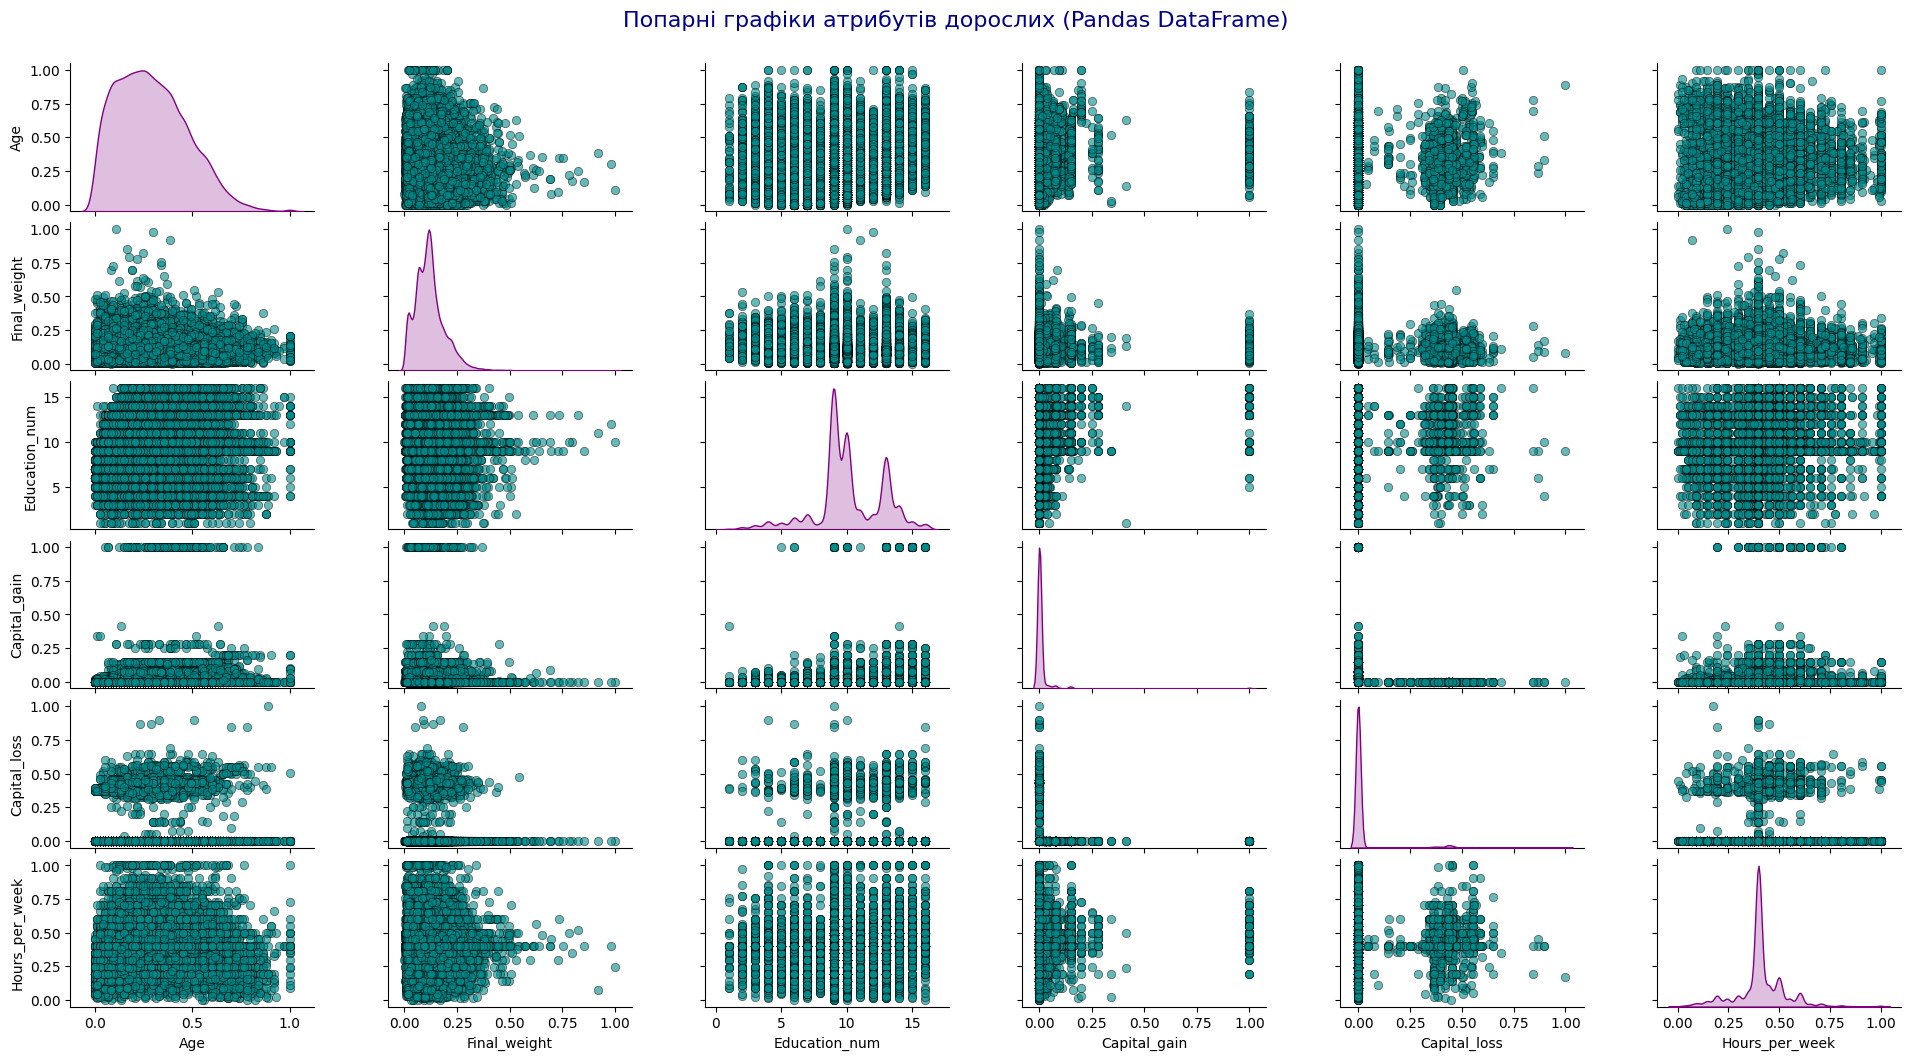

In [9]:
# 7 - Візуалізація багатовимірних даних (Pairplot)

cols_for_pairplot = ['Age', 'Final_weight', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

g = sns.pairplot(df_normalize[cols_for_pairplot], 
                 height=1.8, aspect=1.8,
                 plot_kws=dict(edgecolor="k", linewidth=0.5, alpha=0.6, color='darkcyan'), # Колір точок
                 diag_kind="kde", diag_kws=dict(fill=True, color='purple')) # Колір для KDE

fig = g.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Попарні графіки атрибутів дорослих (Pandas DataFrame)', fontsize=16, color='darkblue')
plt.show()
